In [2]:
    import pandas as pd
    
    
    df1 = pd.read_csv("bici15_cdn.csv")
    
    #Notar como hay muchas columnas y la tabla esta partida
    print(df1)

        bici_id_usuario bici_Fecha_hora_retiro  bici_tiempo_uso  \
0              134224.0    2015-12-31 20:30:05             14.0   
1              134224.0    2015-12-31 19:58:37             25.0   
2              222555.0    2015-12-31 18:42:54             57.0   
3               11504.0    2015-12-31 17:55:29             15.0   
4              183241.0    2015-12-31 16:59:29             24.0   
5              219386.0    2015-12-31 16:15:49             38.0   
6               61261.0    2015-12-31 15:43:33             28.0   
7              218700.0    2015-12-31 14:37:02             11.0   
8               79598.0    2015-12-31 13:28:28             13.0   
9              140587.0    2015-12-31 11:14:25             46.0   
10             181257.0    2015-12-31 10:55:49            173.0   
11             222322.0    2015-12-31 10:33:13             21.0   
12              57399.0    2015-12-31 09:34:53             30.0   
13              89162.0    2015-12-30 23:35:30             41.

In [3]:
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


/home/billy/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


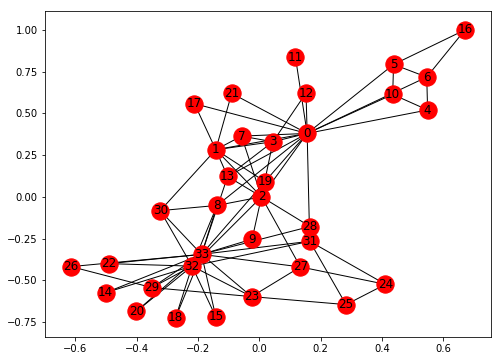

In [5]:

#Un ejemplo pequeño de como mostrar grafos en pantalla. Es el dataset de karate kid creo.
g = nx.karate_club_graph()
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(g, ax=ax)

In [7]:

#Este es sin diferenciar hombres de mujeres in momento del dia
G = nx.DiGraph()
estaciones = set()
for name in df1["bici_nombre_estacion_destino"]:
    estaciones.add(str(name))
for name in df1["bici_nombre_estacion_origen"]:
    estaciones.add(str(name))

edges = dict()
for index, row in df1.iterrows():
    
    key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
    if key not in edges:
        edges[key] = 0
    else:
        edges[key] += 1


In [8]:
G.add_nodes_from(estaciones)
for estaciones, valor in edges.items():
    estaciones_sep = estaciones.split(":::")
    G.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


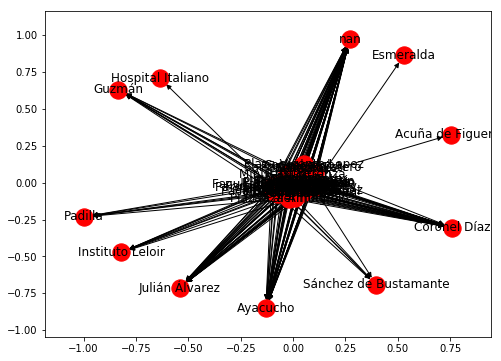

In [51]:

#Se ve horrible! Usar gephi
fig, ax = plt.subplots(1, 1, figsize=(8, 6));
nx.draw_networkx(G, ax=ax)

In [53]:
G_mujeres = nx.DiGraph()

edges_mujeres = dict()
for index, row in df1.iterrows():
    if row["bici_sexo"] == "FEMENINO":
        
        #Lo de ":::" es un hack para que el mapa tenga key ORIGEN:::DESTINO asi es mas facil
        key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
        if key not in edges_mujeres:
            edges_mujeres[key] = 0
        else:
            edges_mujeres[key] += 1
G_mujeres.add_nodes_from(estaciones)
for estaciones, valor in edges_mujeres.items():
    
    #Separo la key en [ORIGEN, DESTINO] partiendo por el separador ":::"
    estaciones_sep = estaciones.split(":::")
    G_mujeres.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


In [54]:
#Lo mismo pero para hombres
G_hombres = nx.DiGraph()

edges_hombres = dict()
for index, row in df1.iterrows():
    if row["bici_sexo"] == "MASCULINO":
        key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
        if key not in edges_hombres:
            edges_hombres[key] = 0
        else:
            edges_hombres[key] += 1
G_hombres.add_nodes_from(estaciones)
for estaciones, valor in edges_hombres.items():
    estaciones_sep = estaciones.split(":::")
    G_hombres.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


In [5]:
#Ejemplo: 2015-12-31 20:30:05
def esdeDia(fechayhora):
    hora = fechayhora.split(" ")[1]
    
    #es siempre con 2 digitos asi que esta todo bien
    solohora = int(hora[0:2])
    #el numero 19 es totalmente arbitrario
    return solohora < 19

In [67]:
assert(esdeDia("2015-12-31 18:30:05"))
assert(not esdeDia("2015-12-31 20:30:05"))

In [64]:
#Lo mismo pero para mujeres
G_mujeres_dia = nx.DiGraph()


edges_mujeres_dia = dict()
for index, row in df1.iterrows():
    if row["bici_sexo"] == "FEMENINO" and esdeDia(row["bici_Fecha_hora_retiro"]):
        key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
        if key not in edges_mujeres_dia:
            edges_mujeres_dia[key] = 0
        else:
            edges_mujeres_dia[key] += 1
G_mujeres_dia.add_nodes_from(estaciones)
for estaciones, valor in edges_mujeres_dia.items():
    estaciones_sep = estaciones.split(":::")
    G_mujeres_dia.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


In [75]:
#etc
G_mujeres_noche = nx.DiGraph()


edges_mujeres_noche = dict()
for index, row in df1.iterrows():
    if row["bici_sexo"] == "FEMENINO" and not esdeDia(row["bici_Fecha_hora_retiro"]):
        key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
        if key not in edges_mujeres_noche:
            edges_mujeres_noche[key] = 0
        else:
            edges_mujeres_noche[key] += 1
G_mujeres_noche.add_nodes_from(estaciones)
for estaciones, valor in edges_mujeres_noche.items():
    estaciones_sep = estaciones.split(":::")
    G_mujeres_noche.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


In [9]:
G_hombres_dia = nx.DiGraph()


edges_hombres_dia = dict()
for index, row in df1.iterrows():
    if row["bici_sexo"] == "MASCULINO" and esdeDia(row["bici_Fecha_hora_retiro"]):
        key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
        if key not in edges_hombres_dia:
            edges_hombres_dia[key] = 0
        else:
            edges_hombres_dia[key] += 1
G_hombres_dia.add_nodes_from(estaciones)
for estaciones, valor in edges_hombres_dia.items():
    estaciones_sep = estaciones.split(":::")
    G_hombres_dia.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


In [10]:
G_hombres_noche = nx.DiGraph()


edges_hombres_noche = dict()
for index, row in df1.iterrows():
    if row["bici_sexo"] == "MASCULINO" and not esdeDia(row["bici_Fecha_hora_retiro"]):
        key = str(row['bici_nombre_estacion_origen']) + ":::" + str(row['bici_nombre_estacion_destino'])
        if key not in edges_hombres_noche:
            edges_hombres_noche[key] = 0
        else:
            edges_hombres_noche[key] += 1
G_hombres_noche.add_nodes_from(estaciones)
for estaciones, valor in edges_hombres_noche.items():
    estaciones_sep = estaciones.split(":::")
    G_hombres_noche.add_edge(estaciones_sep[0], estaciones_sep[1], cant=valor)


In [12]:

#Imprimo los grafos en formato csv para gephi! hay algo medio choto con CANT que se podria arreglar.
#Para diferenciar comportamiento entre hombres y mujeres, notar que parece que las mujeres usan menos las bicis asi que habria que normalizar primero
nx.write_edgelist(G,'G.csv', data=True)
nx.write_edgelist(G_mujeres,'G_mujeres.csv', data=True)
nx.write_edgelist(G_hombres,'G_hombres.csv', data=True)
nx.write_edgelist(G_mujeres_dia,'G_mujeres_dia.csv', data=True)
nx.write_edgelist(G_mujeres_noche,'G_mujeres_noche.csv', data=True)
nx.write_edgelist(G_hombres_dia,'G_hombres_dia.csv', data=True)
nx.write_edgelist(G_hombres_noche,'G_hombres_noche.csv', data=True)